In [1]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import geopandas as gpd
from sklearn.linear_model import LinearRegression
import ER_noise

In [2]:
elects = pd.read_csv("../data/TX_statewide_18_Dem_Runofff.csv").drop(columns=["Unnamed: 0",'WVAP_pct', 
                                                                              'HVAP_pct', 'BVAP_pct',
                                                                              'non_WVAP_pct', 
                                                                              'non_HVAP_pct',
                                                                              'non_BVAP_pct'])
recon_dallas_pcts = pd.read_csv("../../reconstructed_dallas_precicnts_no_elects.csv").drop(columns=["Unnamed: 0"])

elects = pd.merge(left=elects, right=recon_dallas_pcts, on="CNTYVTD")
elects.rename(columns={"HVAP_perc": "HVAP_pct", "BVAP_perc": "BVAP_pct", "WVAP_perc": "WVAP_pct", }, inplace=True)

tx_prec_shapes = gpd.read_file("../data/TX_VTDs_cvap/TX_VTDs_cvap.shp")
dallas_county_pcts = pd.merge(left=tx_prec_shapes, right=elects, on="CNTYVTD").query("CNTY == 113")

In [18]:
irving_city_pcts_08 = np.array(['4637', '4636', '4632', '4628', '4608', '4605', '4626', '4627',
                            '4621', '4610', '4525', '4618', '4640', '4643', '4622', '4606',
                            '4601', '4607', '4602', '4650', '4630', '4634', '4644', '4631',
                            '4600', '4616', '1101', '4609', '4611', '4613', '4614', '4612',
                            '4615', '4645', '4603', '4646', '4635', '4651', '4620', '4604',
                            '4639', '4623', '4619', '4633', '4708', '4638', '4642', '4641',
                            '4624', '4625', '4647', '4649', '4648', '4617', '4448', '4629'],
                            dtype=object)
                            
irving_precincts = dallas_county_pcts[dallas_county_pcts.VTD.apply(lambda p: p in irving_city_pcts)]

In [21]:
set(irving_city_pcts_08) - set(irving_city_pcts_05)

{'4651'}

In [3]:
elects.to_csv("../../reconstructed_dallas_precicnts_w_elects.csv", index=False)

In [70]:
# pd.read_csv("../../reconstructed_dallas_precints_w_elects.csv")

In [3]:
dallas_runs_noised_non_neg = pd.read_csv("dallas_pcts/toydown_recon_non_neg_dallas_county_prec_runs.csv")
dallas_runs_noised_allow_neg = pd.read_csv("dallas_pcts/toydown_recon_allow_neg_dallas_county_prec_runs.csv")

In [4]:
dallas_county_pcts_non_neg = pd.merge(left=dallas_county_pcts, right=dallas_runs_noised_non_neg, on="CNTYVTD")
dallas_county_pcts_allow_neg = pd.merge(left=dallas_county_pcts, right=dallas_runs_noised_allow_neg, on="CNTYVTD")

In [5]:
dallas_county_pcts_non_neg

,CNTY,COLOR,VTD,CNTYVTD,VTDKEY,Shape_area,Shape_len,CVAP,WCVAP,BCVAP,...,24_WVAP_noise,25_WVAP_noise,26_WVAP_noise,27_WVAP_noise,28_WVAP_noise,29_WVAP_noise,30_WVAP_noise,31_WVAP_noise,epsilon,split
0,113,7,1000,1131000,1927,6.761341e+05,4118.312652,1467.683316,441.057386,689.086079,...,426.522933,373.908308,414.548261,406.587162,402.054560,501.469951,400.566335,385.451650,0.25,equal
1,113,7,1000,1131000,1927,6.761341e+05,4118.312652,1467.683316,441.057386,689.086079,...,442.646003,326.792151,593.504885,429.448821,498.409758,396.868028,352.488857,301.364130,0.25,top_heavy
2,113,7,1000,1131000,1927,6.761341e+05,4118.312652,1467.683316,441.057386,689.086079,...,488.385116,437.432988,390.636375,388.719507,487.654583,447.431391,424.943115,510.481854,0.25,mid_heavy
3,113,7,1000,1131000,1927,6.761341e+05,4118.312652,1467.683316,441.057386,689.086079,...,457.733160,259.343802,429.538088,437.512468,363.560913,411.230137,403.879616,393.935318,0.25,bottom_heavy
4,113,7,1000,1131000,1927,6.761341e+05,4118.312652,1467.683316,441.057386,689.086079,...,409.152027,415.093007,378.787081,430.604965,413.823531,412.073422,415.787160,402.136904,0.50,equal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13227,113,6,4664,1134664,2753,4.822348e+06,10357.488285,1512.039106,758.729050,202.136872,...,250.952490,242.305500,239.785346,255.395199,245.990434,249.049208,265.653861,239.795926,1.00,bottom_heavy
13228,113,6,4664,1134664,2753,4.822348e+06,10357.488285,1512.039106,758.729050,202.136872,...,250.641722,254.621154,252.918831,253.565159,255.430758,249.802783,255.182585,251.437028,2.00,equal
13229,113,6,4664,1134664,2753,4.822348e+06,10357.488285,1512.039106,758.729050,202.136872,...,252.942180,256.275178,252.674038,247.649055,249.523905,257.256248,249.259008,249.853028,2.00,top_heavy
13230,113,6,4664,1134664,2753,4.822348e+06,10357.488285,1512.039106,758.729050,202.136872,...,251.930348,247.380203,249.884479,250.234066,249.033552,251.767633,256.242658,246.421939,2.00,mid_heavy


In [16]:
dallas_county_pcts_non_neg.query("epsilon == 1 & split == 'equal'")["HVAP_pct"]

8        0.541750
24       0.662180
40       0.635034
56       0.248711
72       0.223030
           ...   
13160    0.556962
13176    0.721575
13192    0.615520
13208         NaN
13224    0.321429
Name: HVAP_pct, Length: 827, dtype: float64

In [39]:
for race in ["HVAP", "BVAP", "WVAP"]:
    print()
    for filt, weight in [(False, False), (True, False),(False, True)]:
        n_samps = 16
        df = dallas_county_pcts_non_neg.query("epsilon == 1 & split == 'equal'")
        df = df.query("`{}` > 10".format(tot_vote)) if filt else df
        weights = df["18R_Governor_D_tot"].values if weight else None
        num_precints = df.shape[0]
        zeros = np.zeros(n_samps)
        ones = np.zeros(n_samps)
        for i in range(n_samps):
            perc_cand = df["{}{}".format("Valdez", "D_18R_Governor_pct")].fillna(0)
            perc_race_noised = np.reshape((df["{}_{}_noise".format(i, race)] / df["{}_VAP_noise".format(i)]).fillna(0).values,
                                            (num_precints,1))
            line_noised = LinearRegression().fit(perc_race_noised, perc_cand, weights)
            zeros[i] = line_noised.intercept_
            ones[i] = line_noised.predict([[1]])[0]

        print(race)
        print("Filt, Weighted:", filt, weight)
        print("in group: {} {}", round(ones.mean(), 4), ones.var())
        print("out group: ", round(zeros.mean(), 4), zeros.var())


HVAP
Filt, Weighted: False False
in group: {} {} 0.7905 0.00039336616685337446
out group:  0.4771 0.00012653266109215452
HVAP
Filt, Weighted: True False
in group: {} {} 0.8543 2.7230577537752296e-07
out group:  0.5619 1.068253710867172e-07
HVAP
Filt, Weighted: False True
in group: {} {} 0.8638 9.619194920757704e-08
out group:  0.5579 2.4110992721241124e-08

BVAP
Filt, Weighted: False False
in group: {} {} 0.7813 0.0009350160454601371
out group:  0.556 3.930780200771433e-05
BVAP
Filt, Weighted: True False
in group: {} {} 0.8603 2.4117759015918606e-07
out group:  0.6266 1.4660802549981202e-08
BVAP
Filt, Weighted: False True
in group: {} {} 0.8451 7.757142052218924e-08
out group:  0.6008 3.4343212342831574e-09

WVAP
Filt, Weighted: False False
in group: {} {} 0.442 0.00025636596345255324
out group:  0.6859 0.00010302124551168099
WVAP
Filt, Weighted: True False
in group: {} {} 0.437 1.001055524434039e-07
out group:  0.8164 3.141391455271347e-08
WVAP
Filt, Weighted: False True
in group: {}

In [30]:


print(zeros.mean())
print(zeros.var())

0.7904616646180775
0.00039336616685337446
0.4770557164603847
0.00012653266109215452


In [8]:
for race in ["HVAP", "BVAP", "WVAP"]:
    print(race)
    filt_false = ER_noise.point_estimates(dallas_county_pcts_non_neg, "Valdez", race, "D_18R_Governor_pct",
                                 "18R_Governor_D_tot", 1, "equal", filt=False)
    filt_true = ER_noise.point_estimates(dallas_county_pcts_non_neg, "Valdez", race, "D_18R_Governor_pct",
                               "18R_Governor_D_tot", 1, "equal", filt=True)
    print("\tFilt=False\tl(0):{}\tl(1):{}".format(round(filt_false[0], 3), round(filt_false[1],3)))
    print("\tFilt=True\tl(0):{}\tl(1):{}".format(round(filt_true[0],3), round(filt_true[1],3)))

HVAP
	Filt=False	l(0):0.421	l(1):0.903
	Filt=True	l(0):0.562	l(1):0.854
BVAP
	Filt=False	l(0):0.524	l(1):0.957
	Filt=True	l(0):0.627	l(1):0.86
WVAP
	Filt=False	l(0):0.628	l(1):0.541
	Filt=True	l(0):0.816	l(1):0.437


In [7]:
epsilon_values = [0.25, 0.5, 1, 2]
epsilon_splits = ["equal","bottom_heavy", "mid_heavy", "top_heavy",]
candidate = "Valdez"
election = "D_18R_Governor_pct" 
elect_name = "TX Statewide 2018 Dem Runofff Govenor"
tot_vote = "18R_Governor_D_tot"

## Toydown Noise
- non_neg v. allow_neg
- HVAP, BVAP, and WVAP
- weighted v. filtered v. none

In [7]:
elects["HVAP_pct"].mean()

0.39828957138315585

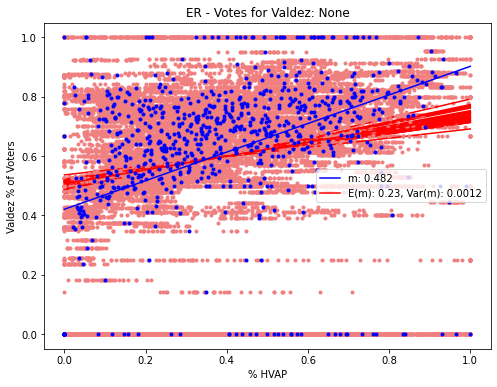

In [8]:
ER_noise.plot_er_graph(dallas_county_pcts_non_neg, "Valdez", "HVAP", None,  election, 
                        tot_vote, 0.25, "top_heavy", weight=False, filt=False,
                        title="ER - Votes for {}: {} | ToyDown noise {}".format(candidate, 
                                                                                elect_name, 
                                                                                True))
plt.show()

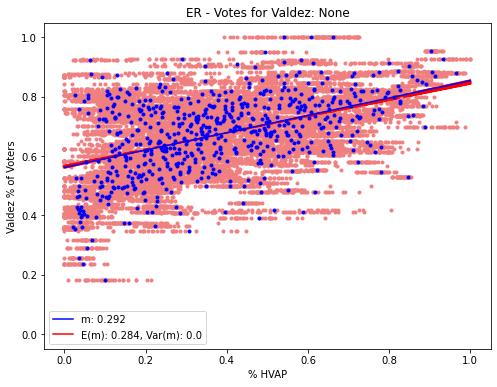

In [9]:
ER_noise.plot_er_graph(dallas_county_pcts_non_neg, "Valdez", "HVAP", None,  election, 
                                            tot_vote, 0.25, "top_heavy", weight=False, filt=True,
                                            title="ER - Votes for {}: {} | ToyDown noise {}".format(candidate, 
                                                                                                    elect_name, 
                                                                                                    True))
plt.show()

### Enforce non-negativity

In [25]:
enforce_non_neg = True

In [26]:
data = dallas_county_pcts_non_neg if enforce_non_neg else dallas_county_pcts_allow_neg
neg_str = "w/non-negativity constraint" if enforce_non_neg else "w/out non-negativity constraint"

for race in ["HVAP", "BVAP", "WVAP"]:
    print(race)
    for filt_weight in ["none", "filt", "weighted"]:
        w = filt_weight == "weighted"
        f = filt_weight == "filt"
        fig, axs = ER_noise.plot_elect_grid(epsilon_values, epsilon_splits, data, candidate, race, election, 
                                            tot_vote, figsize=(20,18), weight=w, filt=f,
                                            title="ER - Votes for {}: {} | ToyDown noise {} | {}".format(candidate, 
                                                                                                    elect_name, 
                                                                                                    neg_str,
                                                                                                    filt_weight))
        plt.savefig("recon_plots/ER_{}_{}_{}_elect_param_grid_{}_neg_{}.png".format(candidate, 
                                                                    elect_name.replace(',', "").replace(' ', '_'),
                                                                    race, "non" if enforce_non_neg else "allow",
                                                                    filt_weight),
                    dpi=200, bbox_inches="tight")
        plt.close()
        
        fig, axs = ER_noise.plot_point_estimate_grid(epsilon_values, epsilon_splits, data, candidate, race, election, 
                                            tot_vote, figsize=(20,18), weight=w, filt=f,
                                            title="ER - Votes for {}: {} | ToyDown noise {} | {}".format(candidate, 
                                                                                                    elect_name, 
                                                                                                    neg_str,
                                                                                                    filt_weight))
        plt.savefig("recon_plots/ER_{}_{}_{}_elect_param_grid_points_{}_neg_{}.png".format(candidate, 
                                                                    elect_name.replace(',', "").replace(' ', '_'),
                                                                    race, "non" if enforce_non_neg else "allow",
                                                                    filt_weight),
                    dpi=200, bbox_inches="tight")
        plt.close()

HVAP


/Users/smaug/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


BVAP
WVAP


### Don't enforce non-negativity

In [27]:
enforce_non_neg = False

In [28]:
data = dallas_county_pcts_non_neg if enforce_non_neg else dallas_county_pcts_allow_neg
neg_str = "w/non-negativity constraint" if enforce_non_neg else "w/out non-negativity constraint"

for race in ["HVAP", "BVAP", "WVAP"]:
    print(race)
    for filt_weight in ["none", "filt", "weighted"]:
        w = filt_weight == "weighted"
        f = filt_weight == "filt"
        fig, axs = ER_noise.plot_elect_grid(epsilon_values, epsilon_splits, data, candidate, race, election, 
                                            tot_vote, figsize=(20,18), weight=w, filt=f,
                                            title="ER - Votes for {}: {} | ToyDown noise {} | {}".format(candidate, 
                                                                                                    elect_name, 
                                                                                                    neg_str,
                                                                                                    filt_weight))
        plt.savefig("recon_plots/ER_{}_{}_{}_elect_param_grid_{}_neg_{}.png".format(candidate, 
                                                                    elect_name.replace(',', "").replace(' ', '_'),
                                                                    race, "non" if enforce_non_neg else "allow",
                                                                    filt_weight),
                    dpi=200, bbox_inches="tight")
        plt.close()
        
        fig, axs = ER_noise.plot_point_estimate_grid(epsilon_values, epsilon_splits, data, candidate, race, election, 
                                            tot_vote, figsize=(20,18), weight=w, filt=f,
                                            title="ER - Votes for {}: {} | ToyDown noise {} | {}".format(candidate, 
                                                                                                    elect_name, 
                                                                                                    neg_str,
                                                                                                    filt_weight))
        plt.savefig("recon_plots/ER_{}_{}_{}_elect_param_grid_points_{}_neg_{}.png".format(candidate, 
                                                                    elect_name.replace(',', "").replace(' ', '_'),
                                                                    race, "non" if enforce_non_neg else "allow",
                                                                    filt_weight),
                    dpi=200, bbox_inches="tight")
        plt.close()

HVAP
BVAP
WVAP


## Gausian Noise
- non_neg v. allow_neg
- HVAP, BVAP, and WVAP
- weighted v. filtered v. none

### Get matching sigmas

In [14]:
col_names = ['TOTPOP', 'HISP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 
             'NH_ASIAN', 'NH_NHPI', 'NH_OTHER*',
             'VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP', 
             'NHPIVAP', 'OTHERVAP*']
pcts = recon_dallas_pcts.CNTYVTD.unique()

In [15]:
pct_unnoised_counts = recon_dallas_pcts.set_index("CNTYVTD").loc[pcts][col_names].values

In [16]:
dallas_pcts_noised_non_neg = pd.read_csv("dallas_pcts/toydown_recon_non_neg_dallas_county_prec_runs.csv")
dallas_pcts_noised_allow_neg = pd.read_csv("dallas_pcts/toydown_recon_allow_neg_dallas_county_prec_runs.csv")

In [17]:
def precinct_l1_error(data, eps, split, run):
    pct_noised_counts = data.query("epsilon == @eps and split == @split").set_index("CNTYVTD").loc[pcts][["{}_{}_noise".format(run, c) for c in col_names]].values
    pct_l1_error = np.abs(pct_unnoised_counts - pct_noised_counts).sum()
    return pct_l1_error

l1_data_pct = pd.DataFrame()
for eps in epsilon_values:
    print("Total epsilon: {}".format(eps))
    for split in ["bottom_heavy", "equal", "mid_heavy", "top_heavy"]:
        pct_l1_errors = [precinct_l1_error(dallas_pcts_noised_non_neg,eps, split, run) for run in range(32)]
        pct_l1_errors_allow_neg = [precinct_l1_error(dallas_pcts_noised_allow_neg,eps, split, run) for run in range(32)]
        
        l1_data_pct = l1_data_pct.append(pd.DataFrame(pct_l1_errors, columns=["L1_error"]).assign(split=split, 
                                                                 allow_neg=False,
                                                                 eps=eps, level="precinct"))
        l1_data_pct = l1_data_pct.append(pd.DataFrame(pct_l1_errors_allow_neg, columns=["L1_error"]).assign(split=split, 
                                                                 allow_neg=True,
                                                                 eps=eps, level="precinct"))

Total epsilon: 0.25
Total epsilon: 0.5
Total epsilon: 1
Total epsilon: 2


In [18]:
l1_data_pct_matching_sds = l1_data_pct.groupby(["eps","split", "allow_neg"]).mean().reset_index()
matching_sd = lambda bc: lambda l1: (l1 * np.sqrt(np.pi)) / (bc*np.sqrt(2))
bc = np.prod(pct_unnoised_counts.shape)
l1_data_pct_matching_sds["sigma"] = l1_data_pct_matching_sds.L1_error.apply(matching_sd(bc))

In [19]:
l1_data_pct_matching_sds.to_csv("expected_l1_error_pcts_recon_and_matching_sigma.csv", index=False)

In [20]:
l1_data_pct_matching_sds.head()

,eps,split,allow_neg,L1_error,sigma
0,0.25,bottom_heavy,False,274384.231545,25.989241
1,0.25,bottom_heavy,True,432375.721960,40.953945
2,0.25,equal,False,295124.098039,27.953688
3,0.25,equal,True,688396.881739,65.203865
4,0.25,mid_heavy,False,469238.776284,44.445556


### Plot Results

In [21]:
enforce_non_neg = True

In [22]:
data = dallas_county_pcts_non_neg if enforce_non_neg else dallas_county_pcts_allow_neg
neg_str = "w/non-negativity constraint" if enforce_non_neg else "w/out non-negativity constraint"

for race in ["HVAP", "BVAP", "WVAP"]:
    print(race)
    for filt_weight in ["none", "filt", "weighted"]:
        w = filt_weight == "weighted"
        f = filt_weight == "filt"
        fig, axs = fig = ER_noise.plot_elect_grid_gaussian_noise(epsilon_values, epsilon_splits, elects, candidate, race, election, 
                                            tot_vote, l1_data_pct_matching_sds, allow_neg=not enforce_non_neg, 
                                            figsize=(20,18), filt=f, weight=w,
                                            title="ER - Votes for {}: {} | Gaussian noise callibrated by ToyDown L1 error {}".format(candidate, 
                                                                                                    elect_name, 
                                                                                                    neg_str))
#         plt.show()
        plt.savefig("recon_plots/ER_{}_{}_{}_elect_param_grid_gaussian_{}_neg_{}.png".format(candidate, 
                                                                    elect_name.replace(',', "").replace(' ', '_'),
                                                                    race, "non" if enforce_non_neg else "allow",
                                                                    filt_weight),
                    dpi=200, bbox_inches="tight")
        plt.close()
        

HVAP
BVAP
WVAP


In [23]:
enforce_non_neg = False

In [24]:
data = dallas_county_pcts_non_neg if enforce_non_neg else dallas_county_pcts_allow_neg
neg_str = "w/non-negativity constraint" if enforce_non_neg else "w/out non-negativity constraint"

for race in ["HVAP", "BVAP", "WVAP"]:
    print(race)
    for filt_weight in ["none", "filt", "weighted"]:
        w = filt_weight == "weighted"
        f = filt_weight == "filt"
        fig, axs = fig = ER_noise.plot_elect_grid_gaussian_noise(epsilon_values, epsilon_splits, elects, candidate, race, election, 
                                            tot_vote, l1_data_pct_matching_sds, allow_neg=not enforce_non_neg, 
                                            figsize=(20,18), filt=f, weight=w,
                                            title="ER - Votes for {}: {} | Gaussian noise callibrated by ToyDown L1 error {}".format(candidate, 
                                                                                                    elect_name, 
                                                                                                    neg_str))
#         plt.show()
        plt.savefig("recon_plots/ER_{}_{}_{}_elect_param_grid_gaussian_{}_neg_{}.png".format(candidate, 
                                                                    elect_name.replace(',', "").replace(' ', '_'),
                                                                    race, "non" if enforce_non_neg else "allow",
                                                                    filt_weight),
                    dpi=200, bbox_inches="tight")
        plt.close()
        

HVAP
BVAP
WVAP


## Scratch

HVAP


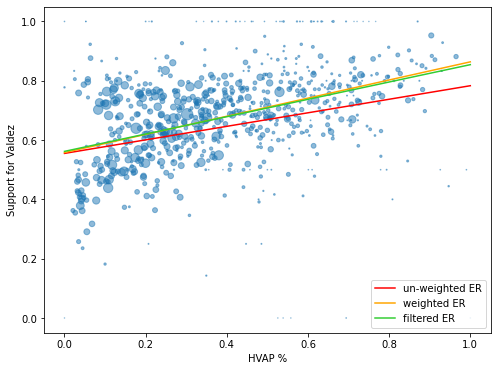

Unweighted Pred:  [0.78331519 0.5550228 ]
Weighted Pred:  [0.86380638 0.55792614]
Filtered Pred:  [0.85431935 0.56188776]
BVAP


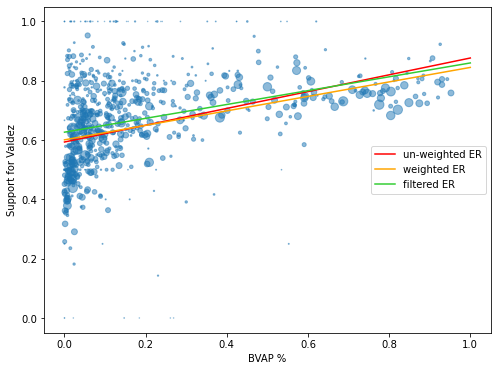

Unweighted Pred:  [0.87676833 0.59345885]
Weighted Pred:  [0.84502968 0.600772  ]
Filtered Pred:  [0.86009023 0.6266488 ]
WVAP


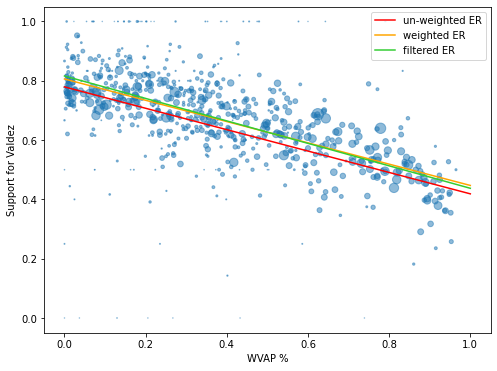

Unweighted Pred:  [0.41863727 0.77936303]
Weighted Pred:  [0.44698884 0.80602799]
Filtered Pred:  [0.43737814 0.8161674 ]


In [29]:
tot_vote = "18R_Governor_D_tot"
xs = np.reshape(np.linspace(0, 1, 100), (100,1))
df = dallas_county_pcts_non_neg.query("epsilon == 1 and split == 'equal'")
for race in ["HVAP", "BVAP", "WVAP"]:
    print(race)
    df_filt = df.query("`{}` > 10".format(tot_vote))
    perc_race = df['{}_pct'.format(race)]
    X = np.reshape(perc_race.values,(perc_race.values.size,1))
    perc_cand = df['ValdezD_18R_Governor_pct']
    weights = df["18R_Governor_D_tot"].values
    reg_w = LinearRegression().fit(X, perc_cand, weights)
    reg = LinearRegression().fit(X, perc_cand)
    
    perc_race_filt = df_filt['{}_pct'.format(race)]
    X_filt = np.reshape(perc_race_filt.values,(perc_race_filt.values.size,1))
    perc_cand_filt = df_filt['ValdezD_18R_Governor_pct']
    reg_filt = LinearRegression().fit(X_filt, perc_cand_filt)
    
    plt.figure(figsize=(8,6))
    plt.scatter(perc_race, perc_cand, marker=".", s=weights, alpha=0.5)
    plt.plot(xs, reg.predict(xs), color="red", label="un-weighted ER")
    plt.plot(xs, reg_w.predict(xs), color="orange", label="weighted ER")
    plt.plot(xs, reg_filt.predict(xs), color="limegreen", label="filtered ER")
    plt.xlabel("{} %".format(race))
    plt.ylabel("Support for Valdez")
    plt.legend()
    plt.savefig("weighted_er.png")
    plt.show()
    print("Unweighted Pred: ", reg.predict([[1],[0]]))
    print("Weighted Pred: ", reg_w.predict([[1],[0]]))
    print("Filtered Pred: ", reg_filt.predict([[1],[0]]))

In [30]:
for race in ["HVAP", "BVAP", "WVAP"]:
    print(race)
    filt_false = ER_noise.point_estimates(dallas_county_pcts_non_neg, "Valdez", race, "D_18R_Governor_pct",
                                 "18R_Governor_D_tot", 1, "equal", filt=False)
    filt_true = ER_noise.point_estimates(dallas_county_pcts_non_neg, "Valdez", race, "D_18R_Governor_pct",
                               "18R_Governor_D_tot", 1, "equal", filt=True)
    print("\tFilt=False\tl(0):{}\tl(1):{}".format(round(filt_false[0], 3), round(filt_false[1],3)))
    print("\tFilt=True\tl(0):{}\tl(1):{}".format(round(filt_true[0],3), round(filt_true[1],3)))



HVAP
	Filt=False	l(0):0.555	l(1):0.783
	Filt=True	l(0):0.562	l(1):0.854
BVAP
	Filt=False	l(0):0.593	l(1):0.877
	Filt=True	l(0):0.627	l(1):0.86
WVAP
	Filt=False	l(0):0.779	l(1):0.419
	Filt=True	l(0):0.816	l(1):0.437


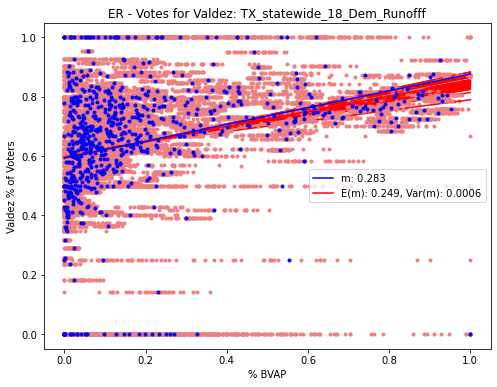

In [31]:
ER_noise.plot_er_graph(dallas_county_pcts_non_neg, "Valdez", "BVAP", "TX_statewide_18_Dem_Runofff",
                       "D_18R_Governor_pct", "18R_Governor_D_tot", 0.5, "top_heavy", filt=False, 
                       weight=False)
plt.show()

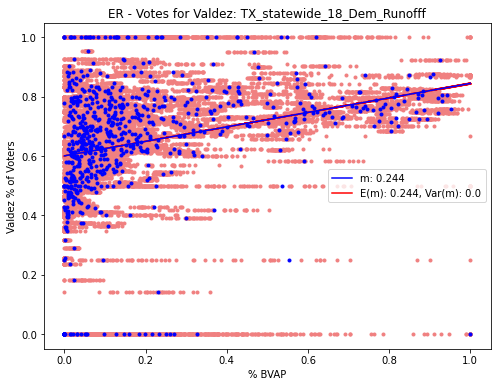

In [32]:
ER_noise.plot_er_graph(dallas_county_pcts_non_neg, "Valdez", "BVAP", "TX_statewide_18_Dem_Runofff",
                       "D_18R_Governor_pct", "18R_Governor_D_tot", 0.5, "top_heavy", filt=False, 
                       weight=True)
plt.show()

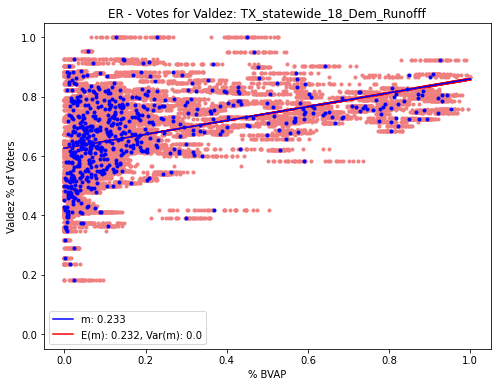

In [33]:
ER_noise.plot_er_graph(dallas_county_pcts_non_neg, "Valdez", "BVAP", "TX_statewide_18_Dem_Runofff",
                       "D_18R_Governor_pct", "18R_Governor_D_tot", 0.5, "top_heavy", filt=True, 
                       weight=False)
plt.show()

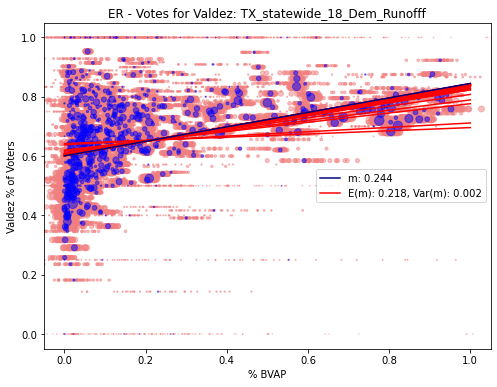

In [20]:
ER_noise.plot_er_graph_gaussian_noise(elects, "Valdez", "BVAP", "TX_statewide_18_Dem_Runofff",
              "18R_Governor_D_tot", sigma=24, n_samps=32, weight=True, filt=False)
plt.show()

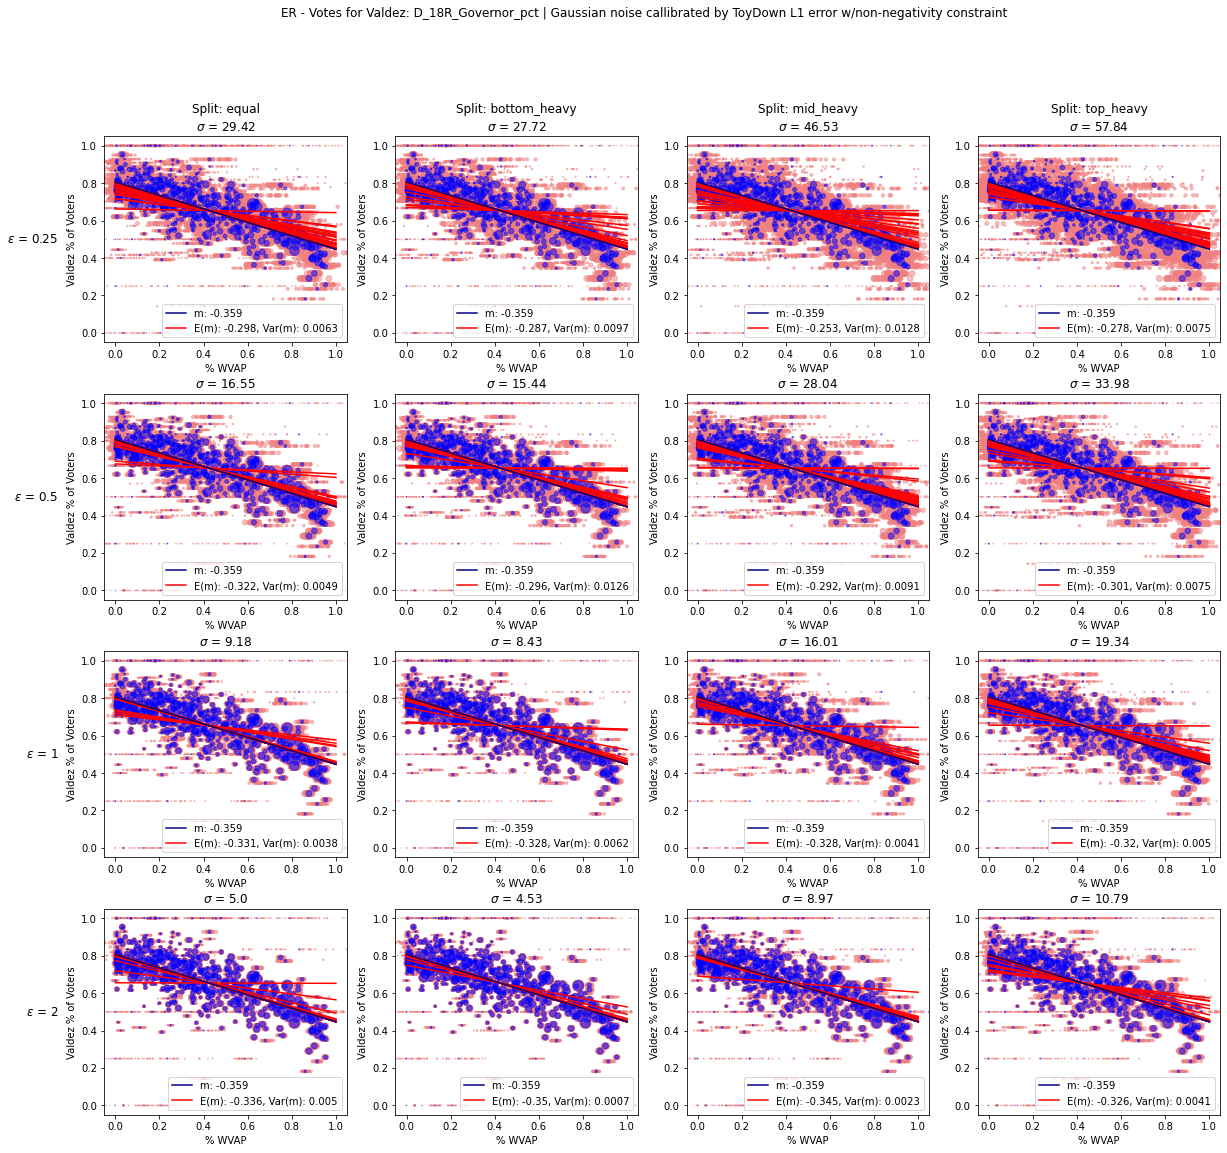

In [60]:
fig = ER_noise.plot_elect_grid_gaussian_noise(epsilon_values, epsilon_splits, elects, candidate, race, election, 
                                     tot_vote, l1_data_pct_matching_sds, allow_neg=False, figsize=(20,18), 
                                     filt=False, weight=True,
            title="ER - Votes for {}: {} | Gaussian noise callibrated by ToyDown L1 error w/non-negativity constraint".format(candidate, election))

In [31]:
pd.read_csv("../data/dallas_reconstruction.csv")

,geoid,TOTPOP,HISP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_NHPI,NH_OTHER*,VAP,HVAP,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP*,tract
0,481130001001001,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,48113000100
1,481130001001004,99.0,4.0,95.0,0.0,0.0,0.0,0.0,0.0,86.0,4.0,82.0,0.0,0.0,0.0,0.0,0.0,48113000100
2,481130001001006,298.0,153.0,89.0,22.0,0.0,19.0,1.0,14.0,220.0,99.0,77.0,21.0,0.0,13.0,1.0,9.0,48113000100
3,481130001001007,98.0,46.0,29.0,20.0,0.0,3.0,0.0,0.0,88.0,39.0,26.0,20.0,0.0,3.0,0.0,0.0,48113000100
4,481130001001008,36.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,48113000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44108,481130107011067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48113010701
44109,481130107011068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48113010701
44110,481130107011069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48113010701
44111,481130107011070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48113010701
